In [1]:
import requests
from json2table import convert
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://api.census.gov/data/'
key = '3b73c25c2be006e16d34baf9a203112b51cacdbf'

In [3]:
year = [2014,2015,2016,2017,2018]
dataset = '/acs/acs1'
var = 'B01001_001E,B01001_002E,B01001_026E,B01002_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_008E,B19055_002E,B19083_001E,B19301_001E'
geo = 'state'
geo_1 = ':*'

In [4]:
col = [('Year', []),
 ('NAME', []),      
 ('Total_Pop', []),
 ('Male_Pop', []),
 ('Female_Pop', []),
 ('Age_Median', []),
 ('White_Pop', []),
 ('Black_AA_Pop', []),
 ('AmericanIndian_AlasNative_Pop', []),
 ('Asian_Pop', []),
 ('PacificNative_Pop', []),
 ('OtherRace_Pop', []),
 ('Social_Security', []),
 ('Gini', []),
 ('PerCapita_Income', []),
 ('state', [])]
 #('county', [])]

for y in year:
    
    full_url = url+str(y)+dataset+'?&get=NAME,'+ var + '&for=' +geo+geo_1
    print(full_url)
    responce = requests.get(full_url).json()
    
    for t in responce:
        col[0][1].append(y)
        for i in range(len(responce[0])):
            val = t[i]
            col[i+1][1].append(val)
            
    
    

https://api.census.gov/data/2014/acs/acs1?&get=NAME,B01001_001E,B01001_002E,B01001_026E,B01002_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_008E,B19055_002E,B19083_001E,B19301_001E&for=state:*
https://api.census.gov/data/2015/acs/acs1?&get=NAME,B01001_001E,B01001_002E,B01001_026E,B01002_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_008E,B19055_002E,B19083_001E,B19301_001E&for=state:*
https://api.census.gov/data/2016/acs/acs1?&get=NAME,B01001_001E,B01001_002E,B01001_026E,B01002_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_008E,B19055_002E,B19083_001E,B19301_001E&for=state:*
https://api.census.gov/data/2017/acs/acs1?&get=NAME,B01001_001E,B01001_002E,B01001_026E,B01002_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_008E,B19055_002E,B19083_001E,B19301_001E&for=state:*
https://api.census.gov/data/2018/acs/acs1?&get=NAME,B01001_001E,B01001_002E,B01001_026E,B01002_001E,B02001_002E,B02001_0

In [5]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
data = df[df['NAME']!='NAME']

In [6]:
data['Median_Age'] = pd.to_numeric(data.Age_Median, downcast='float')
data['Gini_coef'] = pd.to_numeric(data.Gini, downcast='float')
data = data.drop(columns=['Year','Age_Median','Gini'])
data = data[data['NAME']!='Alaska']
data = data[data['NAME']!='Hawaii']
data = data[data['NAME']!='District of Columbia']

/Users/Anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
data.iloc[:,1:-2] = data.iloc[:,1:-2].astype(int)

In [8]:
state_demo = data.groupby('NAME').mean().reset_index()

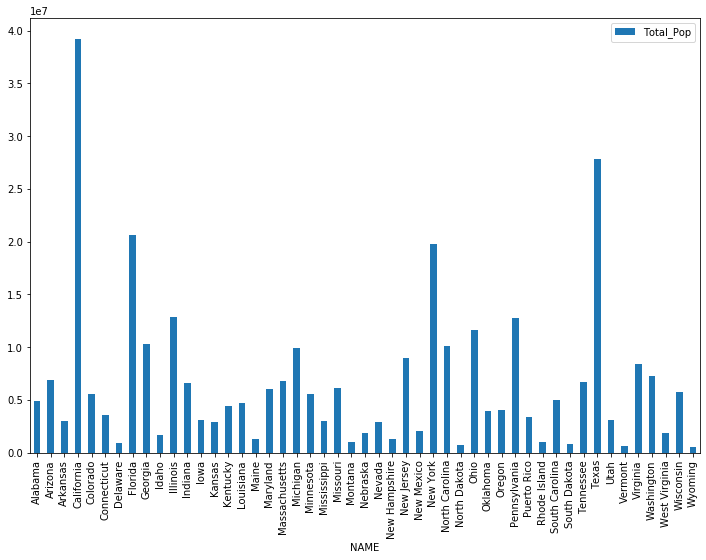

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
state_demo.plot.bar(x='NAME', y='Total_Pop', rot=0, ax=ax)
plt.xticks(x='NAME', rotation='vertical');

In [10]:
state_demo['white_share'] = state_demo.White_Pop / state_demo.Total_Pop
state_demo['aa_share'] = state_demo.Black_AA_Pop / state_demo.Total_Pop
state_demo['ai_an_share'] = state_demo.AmericanIndian_AlasNative_Pop / state_demo.Total_Pop
state_demo['asian_share'] = state_demo.Asian_Pop / state_demo.Total_Pop
state_demo['pn_share'] = state_demo.PacificNative_Pop / state_demo.Total_Pop
state_demo['other_share'] = state_demo.OtherRace_Pop / state_demo.Total_Pop

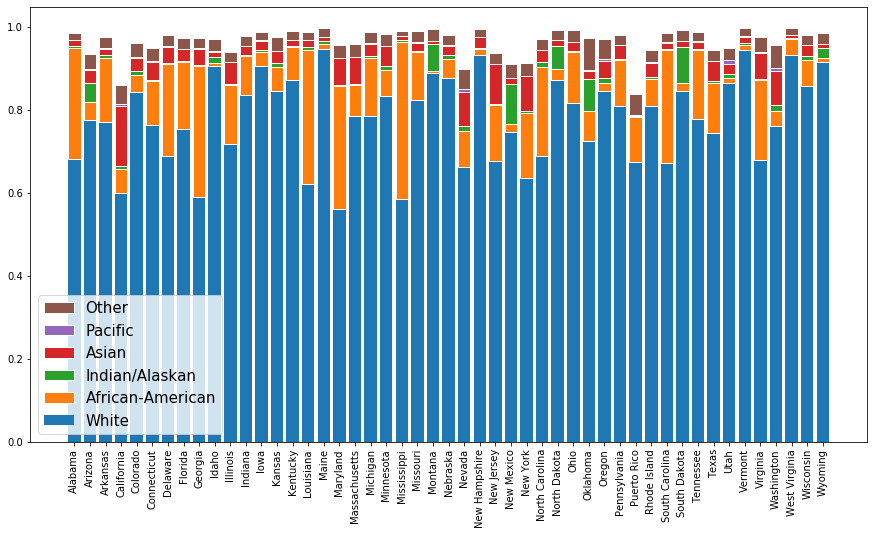

In [11]:
fig, ax = plt.subplots(figsize=(15,8))

p1 = plt.bar(state_demo.NAME, state_demo.white_share)
p2 = plt.bar(state_demo.NAME, state_demo.aa_share, bottom=state_demo.white_share, edgecolor = 'white', linewidth = '1')
p3 = plt.bar(state_demo.NAME, state_demo.ai_an_share, bottom=state_demo.white_share+state_demo.aa_share, edgecolor = 'white', linewidth = '1')
p4 = plt.bar(state_demo.NAME, state_demo.asian_share, bottom=state_demo.white_share+state_demo.aa_share+state_demo.ai_an_share, edgecolor = 'white', linewidth = '1')
p5 = plt.bar(state_demo.NAME, state_demo.pn_share, bottom=state_demo.white_share+state_demo.aa_share+state_demo.ai_an_share+state_demo.asian_share, edgecolor = 'white', linewidth = '1')
p6 = plt.bar(state_demo.NAME, state_demo.other_share, bottom=state_demo.white_share+state_demo.aa_share+state_demo.ai_an_share+state_demo.asian_share+state_demo.pn_share, edgecolor = 'white', linewidth = '1')

plt.xticks(x='NAME', rotation='vertical');
plt.legend((p6[0],p5[0],p4[0], p3[0], p2[0], p1[0]), ('Other', 'Pacific', 'Asian','Indian/Alaskan','African-American', 'White'),prop={'size': 15})

(0, 0.6)

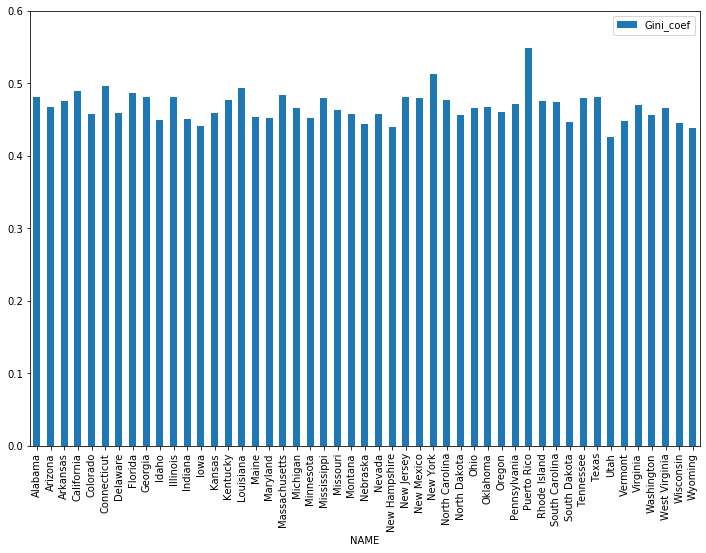

In [134]:
fig, ax = plt.subplots(figsize=(12,8))
state_demo.plot.bar(x='NAME', y='Gini_coef', rot=0, ax=ax)
plt.xticks(x='NAME', rotation='vertical');
plt.ylim(top=0.6)
plt.ylim(bottom=0)


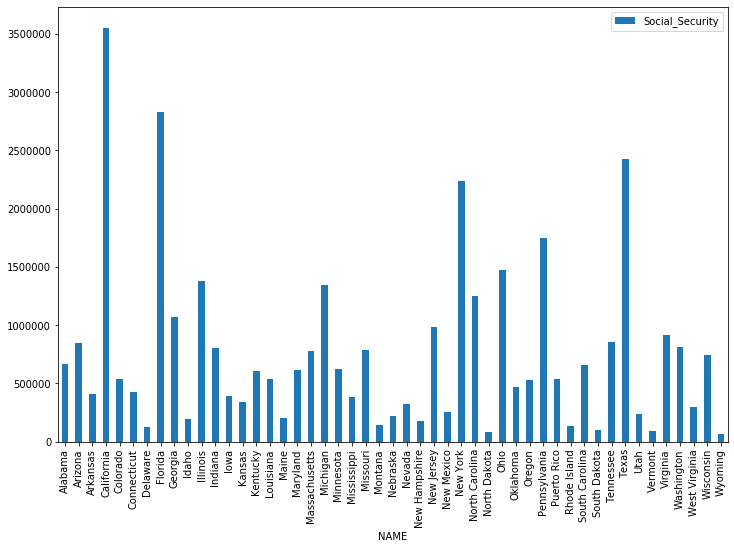

In [138]:
fig, ax = plt.subplots(figsize=(12,8))
state_demo.plot.bar(x='NAME', y='Social_Security', rot=0, ax=ax)
plt.xticks(x='NAME', rotation='vertical');

In [7]:
#County = []
#State = []

#for i in data.NAME:
#    sp = i.split(',')
#    #County.append(sp[0])
#    State.append(sp[1])

IndexError: list index out of range

In [ ]:
#print(len(County),len(State),len(data))

In [454]:
#data.insert(loc=1, column='County', value=County)
#data.insert(loc=1, column='State', value=State)

In [455]:
#data.drop(columns=['NAME','state', 'county'])

,Year,State,County,Total_Pop,Male_Pop,Female_Pop,Age_Median,White_Pop,Black_AA_Pop,AmericanIndian_AlasNative_Pop,Asian_Pop,PacificNative_Pop,OtherRace_Pop,Social_Security,Gini,PerCapita_Income
1,2014,Utah,Cache County,118343,59320,59023,25.2,106227,223,781,3289,440,2095,8191,0.4141,19461
2,2014,Utah,Davis County,329692,166412,163280,30.4,297761,4817,1135,6695,1166,10310,23787,0.3891,26416
3,2014,Utah,Salt Lake County,1091742,548964,542778,32.2,884711,18547,8131,41693,17709,31437,81611,0.4429,28171
4,2014,Utah,Utah County,560974,283080,277894,24.5,517815,3712,2618,7609,3643,15690,28636,0.4121,21113
5,2014,Utah,Washington County,151948,74655,77293,35.1,140986,1370,1738,1041,1488,2097,19795,0.3976,20552
6,2014,Utah,Weber County,240475,120261,120214,32.4,213902,2035,2017,2990,688,8046,18926,0.4026,24156
7,2014,Vermont,Chittenden County,160531,78915,81616,36.3,146944,3356,445,5446,94,3628,16737,0.4398,33115
8,2014,Virginia,Albemarle County,104489,49891,54598,38.4,84611,9344,874,5091,31,2633,11693,0.4994,36777
9,2014,Virginia,Arlington County,226908,113432,113476,34.0,165090,18950,156,23472,374,7126,13346,0.4262,62501
10,2014,Virginia,Augusta County,73862,37292,36570,44.6,68437,3062,206,203,0,1289,11219,0.4074,27045


In [456]:
#data.to_csv('Data/demographics.csv', sep=',')